# 目的
遺伝子学的分類に基づいた、再発の2値分類を実施する。  

In [3]:
# 基本的なライブラリ
import itertools
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# models
from sklearn.linear_model import LogisticRegression  # ロジスティック回帰
from sklearn.neighbors import KNeighborsClassifier  # K近傍法
from sklearn.svm import SVC  # サポートベクターマシン
from sklearn.tree import DecisionTreeClassifier, export_graphviz  # 決定木
from sklearn.ensemble import RandomForestClassifier  # ランダムフォレスト
from sklearn.ensemble import AdaBoostClassifier  # AdaBoost
from sklearn.naive_bayes import GaussianNB  # ナイーブ・ベイズ
from sklearn.decomposition import LatentDirichletAllocation as LDA  # 線形判別分析
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA  # 二次判別分析
from lightgbm import LGBMClassifier
import xgboost as xgb

from sklearn.ensemble import ExtraTreesClassifier

# 評価指標
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# local libraries
import config
import functions

SEED = config.SEED
functions.fix_seed(SEED)


# 最大表示列数の指定（ここでは50列を指定）N
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

%matplotlib inline

df_recurrenced = pd.read_pickle(
    config.INTERIM_PREPROCESSED_RECURRENCE_DIR + "/df_recurrenced.pkl"
)

# データ全体での予測モデル検証

## ベースモデルの学習結果

各特徴量選択されたdfを用いて基本的な2値分類モデルを学習する

0it [00:00, ?it/s]

--------------------------------------------------
subgroup column:  CLAUDIN_SUBTYPE
..................................................
subgroup:  LumB
./../data/interim/PREPROCESSED/RECURRENCE/CLAUDIN_SUBTYPE/vt_std_smote
(216, 17) (20, 17)
base accuracy:  0.5


,acc_train,acc_val,f1_train,f1_val
classifier,,,,
QuadraticDiscriminantAnalysis,0.865741,0.7000,0.865116,0.625000
GradientBoostingClassifier,1.000000,0.6500,1.000000,0.533333
AdaBoostClassifier,0.967593,0.5000,0.967742,0.444444
DecisionTreeClassifier,0.768519,0.5000,0.776786,0.444444
LogisticRegression,0.703704,0.5000,0.711712,0.444444
SGDClassifier,0.587963,0.5000,0.618026,0.375000
KNeighborsClassifier,0.773148,0.4500,0.780269,0.352941
SVC,0.773148,0.4375,0.775378,0.310391
RandomForestClassifier,0.847222,0.4000,0.850679,0.250000


(216, 17) (20, 17)
base accuracy:  0.5


,acc_train,acc_val,f1_train,f1_val
classifier,,,,
LGBMClassifier,1.0,0.5,1.0,0.375


(216, 17) (20, 17)
base accuracy:  0.5


,acc_train,acc_val,f1_train,f1_val
classifier,,,,
ExtraTreesClassifier,1.0,0.45,1.0,0.153846


..................................................
subgroup:  Her2
./../data/interim/PREPROCESSED/RECURRENCE/CLAUDIN_SUBTYPE/vt_std_smote
(134, 9) (11, 9)
base accuracy:  0.5


,acc_train,acc_val,f1_train,f1_val
classifier,,,,
QuadraticDiscriminantAnalysis,0.895522,0.818182,0.900000,0.666667
SGDClassifier,0.604478,0.636364,0.644295,0.600000
RandomForestClassifier,0.843284,0.727273,0.839695,0.571429
LogisticRegression,0.664179,0.636364,0.661654,0.500000
KNeighborsClassifier,0.813433,0.545455,0.838710,0.444444
SVC,0.731343,0.590909,0.729793,0.433333
GaussianNB,0.708955,0.454545,0.706767,0.400000
DecisionTreeClassifier,0.805970,0.636364,0.803030,0.333333
GradientBoostingClassifier,1.000000,0.636364,1.000000,0.333333


(134, 9) (11, 9)
base accuracy:  0.5


,acc_train,acc_val,f1_train,f1_val
classifier,,,,
LGBMClassifier,1.0,0.727273,1.0,0.571429


(134, 9) (11, 9)
base accuracy:  0.5


,acc_train,acc_val,f1_train,f1_val
classifier,,,,
ExtraTreesClassifier,1.0,0.636364,1.0,0.333333


..................................................
subgroup:  LumA
./../data/interim/PREPROCESSED/RECURRENCE/CLAUDIN_SUBTYPE/vt_std_smote
(192, 17) (20, 17)
base accuracy:  0.5


,acc_train,acc_val,f1_train,f1_val
classifier,,,,
RandomForestClassifier,0.828125,0.6500,0.827225,0.720000
GaussianNB,0.645833,0.6000,0.649485,0.666667
QuadraticDiscriminantAnalysis,0.828125,0.6000,0.823529,0.666667
SVC,0.743490,0.5625,0.750367,0.653077
KNeighborsClassifier,0.671875,0.5500,0.651934,0.640000
LogisticRegression,0.656250,0.5000,0.652632,0.583333
AdaBoostClassifier,0.942708,0.5500,0.942408,0.571429
GradientBoostingClassifier,1.000000,0.4500,1.000000,0.521739
SGDClassifier,0.604167,0.5000,0.591398,0.500000


(192, 17) (20, 17)
base accuracy:  0.5


,acc_train,acc_val,f1_train,f1_val
classifier,,,,
LGBMClassifier,1.0,0.55,1.0,0.608696


(192, 17) (20, 17)
base accuracy:  0.5


,acc_train,acc_val,f1_train,f1_val
classifier,,,,
ExtraTreesClassifier,1.0,0.65,1.0,0.740741


1it [00:02,  2.96s/it]

..................................................
subgroup:  claudin-low
./../data/interim/PREPROCESSED/RECURRENCE/CLAUDIN_SUBTYPE/vt_std_smote
pkl file does not exist
pkl file does not exist
pkl file does not exist
..................................................
subgroup:  Basal
./../data/interim/PREPROCESSED/RECURRENCE/CLAUDIN_SUBTYPE/vt_std_smote
pkl file does not exist
pkl file does not exist
pkl file does not exist
..................................................
subgroup:  Normal
./../data/interim/PREPROCESSED/RECURRENCE/CLAUDIN_SUBTYPE/vt_std_smote
pkl file does not exist
pkl file does not exist
pkl file does not exist
..................................................
subgroup:  NC
./../data/interim/PREPROCESSED/RECURRENCE/CLAUDIN_SUBTYPE/vt_std_smote
pkl file does not exist
pkl file does not exist
pkl file does not exist


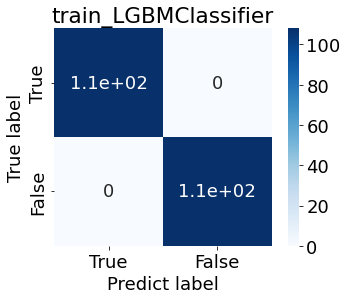

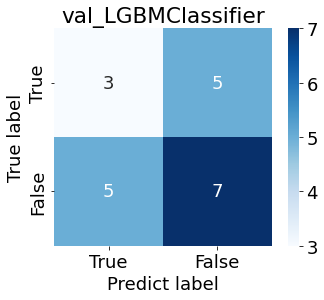

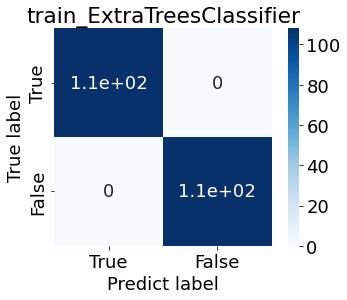

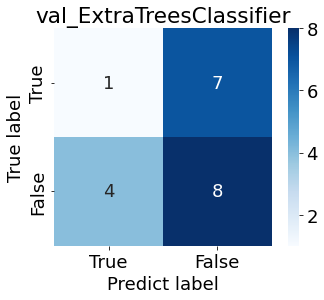

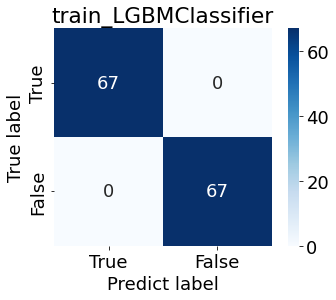

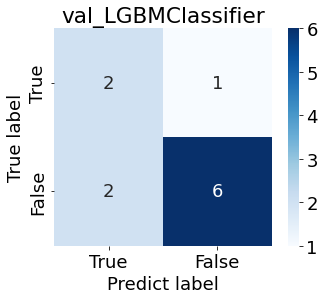

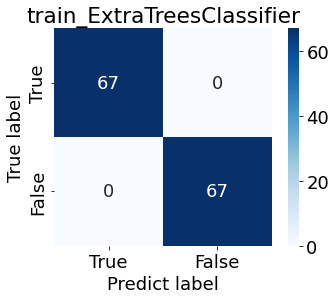

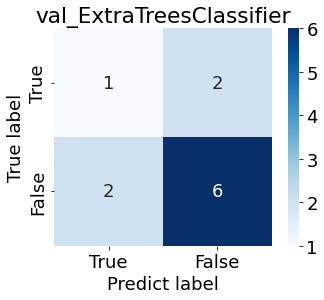

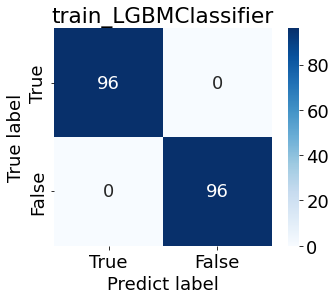

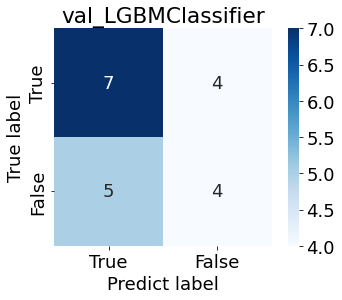

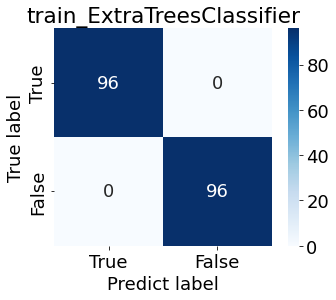

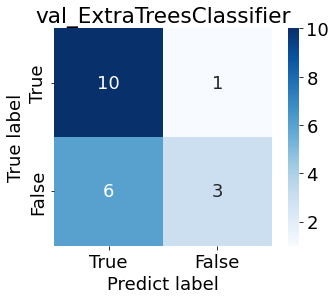

In [4]:
def validate_models(
    input_file_path: str = None,
    input_file_name: str = None,
    classifiers: list = config.classifiers,
    plot: bool = False,
):
    try:
        list_train, list_val, _, _ = functions.read_preprocessed_df(
            input_file_path, input_file_name
        )
    except:
        return
    X_train, y_train = list_train[0], list_train[1]
    X_val, y_val = list_val[0], list_val[1]
    print(X_train.shape, X_val.shape)

    # accuracyの表示
    print("base accuracy: ", (y_train == 1).sum() / y_train.shape[0])
    display(
        functions.compare_bcms(
            X_train,
            y_train,
            X_val,
            y_val,
            classifiers=classifiers,
            plot=plot,
        )
    )


# サブグループ削除（一時的に）
subgroup_columns = [
    "CLAUDIN_SUBTYPE",
    # "NPI_CAT",
    # "TUMOR_CAT",
    # "LYMPH_CAT",
]

feature_selection_methods = [
    "vt",
    # "mrmr"
]

scaling_methods = [
    "std",
    # "norm"
]

sampling_methods = [
    # "none",
    "smote"
]

for feature_selection_method, scaling_method, sampling_method in tqdm(
    itertools.product(feature_selection_methods, scaling_methods, sampling_methods)
):
    preprocess_order = "{0}_{1}_{2}".format(
        feature_selection_method, scaling_method, sampling_method
    )
    print("=====" * 10)
    for subgroup_column in subgroup_columns:  # 各サブグループへの適用
        print("-----" * 10)
        print("subgroup column: ", subgroup_column)

        for subgroup in df_recurrenced[subgroup_column].unique():  # サブグループ毎への適用
            print("....." * 10)
            print("subgroup: ", subgroup)
            input_file_path = "./{0}/{1}/{2}".format(
                config.INTERIM_PREPROCESSED_RECURRENCE_DIR,
                subgroup_column,
                preprocess_order,
                plot=True,
            )
            print(input_file_path)
            validate_models(
                input_file_path=input_file_path, input_file_name=subgroup, plot=False
            )

            params = {
                "class_weight": "balanced",
                "random_state": SEED,
            }
            validate_models(
                input_file_path=input_file_path,
                input_file_name=subgroup,
                classifiers=[LGBMClassifier(**params)],
                plot=True,
            )

            params = {
                "class_weight": "balanced",
                "random_state": SEED,
            }
            validate_models(
                input_file_path=input_file_path,
                input_file_name=subgroup,
                classifiers=[ExtraTreesClassifier(**params)],
                plot=True,
            )

## xgboost

In [3]:
# サブグループ削除（一時的に）
subgroup_columns = [
    "CLAUDIN_SUBTYPE",
    # "NPI_CAT",
    # "TUMOR_CAT",
    # "LYMPH_CAT",
]

feature_selection_methods = [
    "variance_threshold",
    # "mrmr"
]


scaling_methods = [
    "std",
    # "norm"
]


for feature_selection_method, scaling_method in tqdm(
    itertools.product(feature_selection_methods, scaling_methods)
):
    print("=====" * 10)
    for subgroup_column in subgroup_columns:  # 各サブグループへの適用
        print("-----" * 10)
        print("subgroup column: ", subgroup_column)
        for subgroup in df_recurrenced[subgroup_column].unique():  # サブグループ毎への適用
            print("....." * 10)
            print("subgroup: ", subgroup)
            file_path = "./{0}/{1}/{2}".format(
                config.INTERIM_PREPROCESSED_RECURRENCE_DIR,
                subgroup_column,
                feature_selection_method,
                scaling_method,
            )
            file_name = subgroup

            try:
                list_train, list_val, _, _ = functions.read_preprocessed_df(
                    file_path, file_name
                )
            except:
                continue

            X_train, y_train = list_train[0], list_train[1].map(lambda x: int(x))
            X_val, y_val = list_val[0], list_val[1].map(lambda x: int(x))

            # scaling
            X_train, X_val = functions.transform_std(X_train, X_val)
            sm = SMOTE(random_state=SEED)
            X_train, y_train = sm.fit_resample(X_train, y_train)

            xgb_train = xgb.DMatrix(
                X_train, label=y_train, feature_names=X_train.columns
            )
            xgb_val = xgb.DMatrix(X_val, label=y_val, feature_names=X_val.columns)

            param = {
                # 二値分類問題
                "objective": "binary:logistic",
            }
            clf = xgb.train(param, xgb_train)
            y_val_pred_proba = clf.predict(xgb_val)
            y_val_pred = np.where(y_val_pred_proba > 0.5, 1, 0)
            functions.show_scores(y_val, y_val_pred)

1it [00:00, 306.02it/s]

--------------------------------------------------
subgroup column:  CLAUDIN_SUBTYPE
..................................................
subgroup:  LumB
pkl file does not exist
..................................................
subgroup:  Her2
pkl file does not exist
..................................................
subgroup:  LumA
pkl file does not exist
..................................................
subgroup:  claudin-low
pkl file does not exist
..................................................
subgroup:  Basal
pkl file does not exist
..................................................
subgroup:  Normal
pkl file does not exist
..................................................
subgroup:  NC
pkl file does not exist
